## Los datos registran datos de indicadores socioeconómicos e índice y grado de marginación por entidad federativa y lugar que ocupa en el contexto nacional 1990-2015, estimados a partir de información registrada en los censos de población y vivienda 1990, 2000 y 2010. así como de los conteos de población y vivienda de 1995 y 2005 y la encuesta Intercensal 2015, en México. Fuente: Datos Abiertos CONAPO, 2024. Licencia: Libre USO MX.

In [13]:
pip install mysql-connector-python myplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import mysql.connector
import numpy as np
import myplotlib as plt
from tabulate import tabulate

In [16]:
def connect_to_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        port="3306",
        password="Milo.Miyu.3",
        database="marginalizacion_mexico"
    )

In [17]:
def fetch_data(query):
    connection = connect_to_db()
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(data, columns=columns)
    cursor.close()
    connection.close()
    return df

In [69]:
def plot_data(df):
    df.plot(kind='bar', x='NOM_ENT', y='ANALF')
    plt.xlabel('Municipios')
    plt.ylabel('Analfabetismo')
    plt.show()

In [37]:
def print_table(df):
    print(tabulate(df, headers='keys', tablefmt='psql'))

AttributeError: module 'myplotlib' has no attribute 'show'

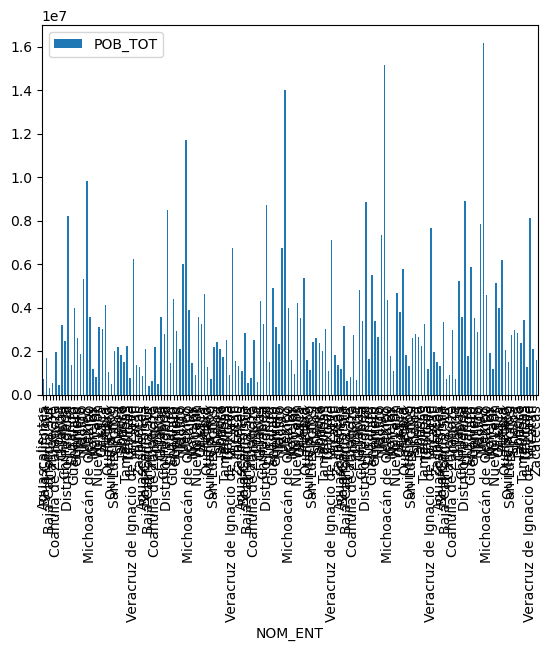

In [51]:
query = "SELECT * FROM base_indice_de_marginacion_estatal_90_15"
data_df = fetch_data(query)
plot_data(data_df)

In [33]:
query = "SELECT * FROM base_indice_de_marginacion_estatal_90_15"
data_df = fetch_data(query)
print_table(data_df)

+-----+-----------+---------------------------------+-----------+---------+---------+---------+---------+---------+--------+--------+---------------+---------+----------+-------+----------+------------+---------+-------+
|     |   CVE_ENT | NOM_ENT                         |   POB_TOT |   ANALF |   SPRIM |   OVSDE |   OVSEE |   OVSAE |   VHAC |   OVPT |   PLmenor5000 |   PO2SM | OVSDSE   |    IM | GM       | IND0A100   |   LUGAR |   AÑO |
|-----+-----------+---------------------------------+-----------+---------+---------+---------+---------+---------+--------+--------+---------------+---------+----------+-------+----------+------------+---------+-------|
|   0 |         1 | Aguascalientes                  |    719659 |    7.06 |   33.85 |   10.88 |    4.97 |    4.18 |  51.03 |   7.45 |         26.97 |   62.53 | -        | -0.89 | Bajo     | -          |      27 |  1990 |
|   1 |         2 | Baja California                 |   1660855 |    4.68 |   24.01 |    4.89 |   10.49 |   19.59 | 

In [ ]:
## Los DataFrame generados tienen información contenida en columnas por medio de abreviaciones o siglas las cuales tienen el siguiente significado:

#CVE_ENT: Clave de entidad federativa

#ENT: Entidad federativa (estado)

#CVE_MUN: Clave del municipio

#MUN: Nombre del municipio

#POB_TOT: Población total

#VP: Viviendas particulares habitadas

#ANALF: Porcentaje de población de 15 años y más analfabeta

#SPRIM: Porcentaje de población de 15 años y más con educación primaria incompleta

#OVSDE: Porcentaje de viviendas particulares habitadas sin drenaje ni excusado

#OVSEE: Porcentaje de viviendas particulares habitadas sin energía eléctrica

#OVSAE: Porcentaje de viviendas particulares habitadas sin agua entubada

#VHAC: Promedio de ocupantes por cuarto en las viviendas particulares habitadas

#OVPT: Porcentaje de viviendas particulares habitadas con piso de tierra

#PLmenor5000: Población en localidades con menos de 5,000 habitantes

#PO2SM: Porcentaje de población ocupada con ingresos de hasta dos salarios mínimos

#OVSD: Porcentaje de viviendas particulares habitadas sin disponibilidad de servicios de salud

#OVSDSE: Porcentaje de viviendas particulares habitadas sin disponibilidad de servicios sanitarios excluyendo las fosas sépticas

#IM: Índice de Marginación

#GM: Grado de Marginación (Muy bajo, Bajo, Medio, Alto, Muy alto)

#IND0A100: Índice de desarrollo humano

#LUG_NAC: Lugar a nivel nacional en el índice de marginación

#LUGAR_EST: Lugar a nivel estatal en el índice de marginación

#AÑO: Año de los datos


In [47]:
def tabla(df):
    print(df)

  NOM_ENT   AÑO  ANALF
0  Sonora  1990   5.62
1  Sonora  1995   4.95
2  Sonora  2005   3.73
3  Sonora  2010   3.06
4  Sonora  2015   2.19


AttributeError: module 'myplotlib' has no attribute 'xlabel'

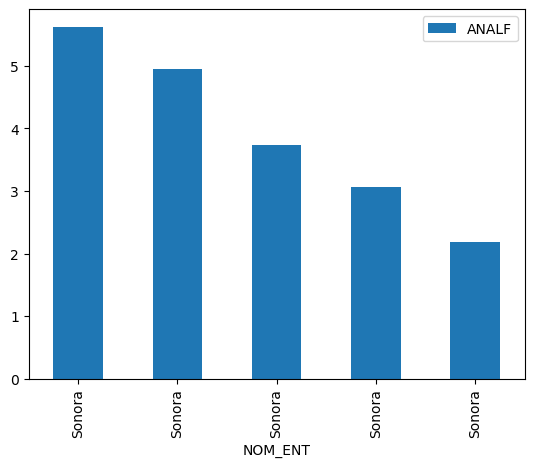

In [78]:
#Se hará un análisis del porcentaje de Analfabetismo para personas de mas de 15 años del estado de Sonora conforme pasan los años.
query = "SELECT NOM_ENT, AÑO, ANALF FROM base_indice_de_marginacion_estatal_90_15 WHERE NOM_ENT = 'Sonora';)"
data_df = fetch_data(query)
tabla(data_df)
plot_data(data_df)

In [84]:
def plot_data_primaria(df):
    df.plot(kind='bar', x='AÑO', y='SPRIM')
    plt.xlabel('Año')
    plt.ylabel('Población de 15 años y más con educación primaria incompleta')
    plt.show()

  NOM_ENT   AÑO  SPRIM
0  Sonora  1990  29.08
1  Sonora  1995  20.09
2  Sonora  2005  17.21
3  Sonora  2010  14.40
4  Sonora  2015  11.15


AttributeError: module 'myplotlib' has no attribute 'xlabel'

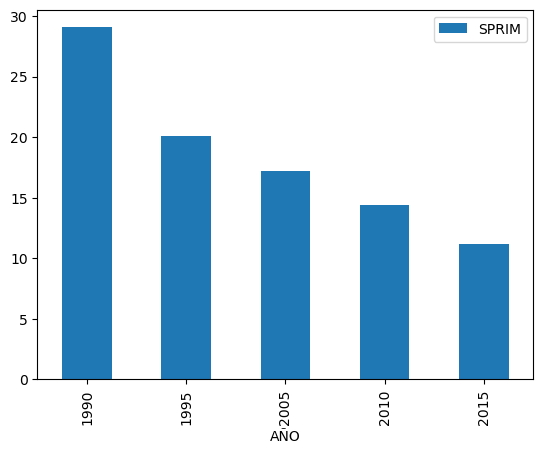

In [85]:
#Se hará un análisis del Porcentaje de población de 15 años y más con educación primaria incompleta del estado de Sonora conforme pasan los años.
query = "SELECT NOM_ENT, AÑO, SPRIM FROM base_indice_de_marginacion_estatal_90_15 WHERE NOM_ENT = 'Sonora';)"
data_df = fetch_data(query)
tabla(data_df)
plot_data_primaria(data_df)

In [87]:
def plot_data_IM(df):
    df.plot(kind='bar', x='AÑO', y='IM')
    plt.xlabel('Año')
    plt.ylabel('Índice de Marginación de la Población del Estado de Sonora')
    plt.show()

  NOM_ENT   AÑO    IM    GM
0  Sonora  1990 -0.86  Bajo
1  Sonora  1995 -0.85  Bajo
2  Sonora  2005 -0.75  Bajo
3  Sonora  2010 -0.70  Bajo
4  Sonora  2015 -0.70  Bajo


AttributeError: module 'myplotlib' has no attribute 'xlabel'

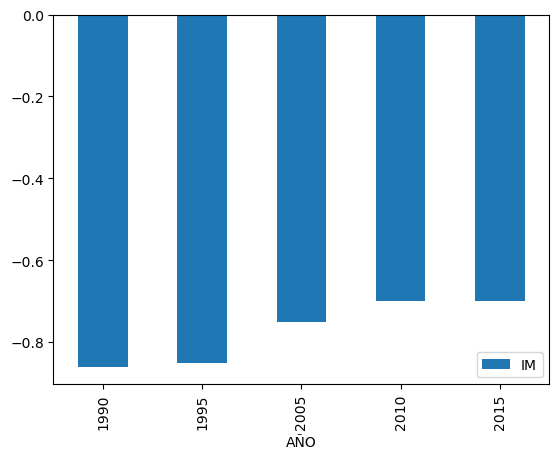

In [88]:
#Se hará un análisis del Índice de Marginación y su grado del estado de Sonora conforme pasan los años.
query = "SELECT NOM_ENT, AÑO, IM, GM FROM base_indice_de_marginacion_estatal_90_15 WHERE NOM_ENT = 'Sonora';)"
data_df = fetch_data(query)
tabla(data_df)
plot_data_IM(data_df)

In [ ]:
#En este archivo se puede apreciar como ha disminuido la marginación en la población del estado de sonora.